In [1]:
import pandas as pd
import evds
import numpy as np
import matplotlib.pyplot as plt
from lazypredict.Supervised import LazyRegressor
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from datetime import date
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn import linear_model
from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import combinations
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.api import VAR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import ParameterGrid
import numpy as np
import seaborn as sns
import warnings
from sklearn.pipeline import make_pipeline
from sklearn.kernel_ridge import KernelRidge
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_friedman2
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import SGDRegressor
import statsmodels.api as sm
import itertools
import pmdarima as pm
from sklearn.pipeline import make_pipeline
from pmdarima.arima import auto_arima
from sklearn.kernel_ridge import KernelRidge		
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.ar_model import AutoReg
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from pmdarima.model_selection import train_test_split
from evds import evdsAPI
import pandas as pd
import numpy as np
import requests
import json
from urllib.parse import urlencode
warnings.filterwarnings("ignore")

c:\Users\Bora\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\Bora\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\Bora\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
buyume=pd.read_excel("gayrisafi yurtici hasila uretim yontemiyle mevsim ve takvim etkisinden arindirilmis zincirlenmis hac.xls")
buyume=buyume.iloc[:33,[1,19,20,21,22]].dropna().T
veri=[]
for i in range(1,len(buyume.columns)):
   veri.append(buyume.iloc[:,i].values[1:])

In [3]:
veri=np.array(veri)
veri=veri.reshape(1,-1)
veri=pd.DataFrame(veri.T)
veri.columns=["Büyüme"]
veri=veri.set_index(pd.date_range(start="1999-03-31",freq="Q",periods=len(veri)))
veri

,Büyüme
1999-03-31,-1.69
1999-06-30,-0.56
1999-09-30,-1.69
1999-12-31,2.99
2000-03-31,1.57
...,...
2022-12-31,1.15
2023-03-31,-0.16
2023-06-30,3.61
2023-09-30,0.31


In [4]:
with open("C:/Users/Bora/Desktop/api.txt") as api:
    key=api.read()

In [5]:
params = {
    'series': "TP.DK.USD.S.YTL",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

usd = formatted_response['items']
usd = pd.DataFrame(usd)


usd = usd.drop(columns=['UNIXTIME','Tarih'])
usd.columns = ['USD/TL']
usd['USD/TL'] = pd.to_numeric(usd['USD/TL'])
usd=usd.set_index(pd.date_range(start="2006-01-31",freq="Q",periods=len(usd)))
usd=usd.pct_change()*100
usd=usd.dropna()
usd

,USD/TL
2006-06-30,9.34
2006-09-30,3.11
2006-12-31,-2.95
2007-03-31,-3.18
2007-06-30,-5.02
...,...
2023-06-30,9.53
2023-09-30,29.66
2023-12-31,6.29
2024-03-31,8.45


In [6]:
params = {
    'series': "TP.KREHACBS.A1",
    'startDate': "31-12-2007",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

kredi = formatted_response['items']
kredi = pd.DataFrame(kredi)


kredi = kredi.drop(columns=['UNIXTIME','Tarih'])
kredi.columns = ['Kredi']
kredi['Kredi'] = pd.to_numeric(kredi['Kredi'])
kredi=kredi.set_index(pd.date_range(start="31-12-2007",freq="Q",periods=len(kredi)))
kredi=kredi.pct_change()*100
kredi=kredi.dropna()
kredi

,Kredi
2008-03-31,8.30
2008-06-30,9.38
2008-09-30,6.21
2008-12-31,2.12
2009-03-31,-2.37
...,...
2023-03-31,12.10
2023-06-30,15.38
2023-09-30,11.52
2023-12-31,8.22


In [7]:
params = {
    'series': "TP.KKHARTUT.KT1",
    'startDate': "31-03-2014",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

kart = formatted_response['items']
kart = pd.DataFrame(kart)


kart = kart.drop(columns=['UNIXTIME','Tarih'])
kart.columns = ['Kart']
kart['Kart'] = pd.to_numeric(kart['Kart'])
kart=kart.set_index(pd.date_range(start="31-03-2014",freq="Q",periods=len(kart)))
kart=kart.pct_change()*100
kart=kart.dropna()
kart

,Kart
2014-06-30,6.76
2014-09-30,4.45
2014-12-31,0.34
2015-03-31,2.98
2015-06-30,10.86
2015-09-30,2.10
2015-12-31,-0.96
2016-03-31,0.43
2016-06-30,7.91
2016-09-30,1.06


In [8]:
params = {
    'series': "TP.CLI2.A01",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

öncü = formatted_response['items']
öncü = pd.DataFrame(öncü)


öncü = öncü.drop(columns=['UNIXTIME','Tarih'])
öncü.columns = ['Öncü Gösterge']
öncü['Öncü Gösterge'] = pd.to_numeric(öncü['Öncü Gösterge'])
öncü=öncü.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(öncü)))
öncü=öncü.pct_change()*100
öncü=öncü.dropna()
öncü

,Öncü Gösterge
1999-06-30,1.97
1999-09-30,-0.09
1999-12-31,2.52
2000-03-31,3.53
2000-06-30,-0.18
...,...
2023-03-31,1.90
2023-06-30,1.16
2023-09-30,0.98
2023-12-31,0.13


In [9]:
params = {
    'series': "TP.IHRACATBEC.9999",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

ihracat = formatted_response['items']
ihracat = pd.DataFrame(ihracat)


ihracat = ihracat.drop(columns=['UNIXTIME','Tarih'])
ihracat.columns = ['İhracat']
ihracat['İhracat'] = pd.to_numeric(ihracat['İhracat'])
ihracat=ihracat.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(ihracat)))
ihracat=ihracat.pct_change()*100
ihracat=ihracat.dropna()
ihracat

,İhracat
2013-06-30,2.94
2013-09-30,-2.84
2013-12-31,6.01
2014-03-31,0.80
2014-06-30,0.07
2014-09-30,-4.06
2014-12-31,2.62
2015-03-31,-6.26
2015-06-30,-2.07
2015-09-30,-7.43


In [10]:
params = {
    'series': "TP.ITHALATBEC.9999",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

ithalat = formatted_response['items']
ithalat = pd.DataFrame(ithalat)


ithalat = ithalat.drop(columns=['UNIXTIME','Tarih'])
ithalat.columns = ['İthalat']
ithalat['İthalat'] = pd.to_numeric(ithalat['İthalat'])
ithalat=ithalat.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(ithalat)))
ithalat=ithalat.pct_change()*100
ithalat=ithalat.dropna()
ithalat

,İthalat
2013-06-30,13.05
2013-09-30,-6.94
2013-12-31,2.39
2014-03-31,-8.64
2014-06-30,6.98
2014-09-30,-3.02
2014-12-31,2.23
2015-03-31,-14.94
2015-06-30,2.66
2015-09-30,-8.07


In [11]:
params = {
    'series': "TP.KTF17",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

tfaiz = formatted_response['items']
tfaiz = pd.DataFrame(tfaiz)


tfaiz = tfaiz.drop(columns=['UNIXTIME','Tarih'])
tfaiz.columns = ['Ticari Faiz']
tfaiz['Ticari Faiz'] = pd.to_numeric(tfaiz['Ticari Faiz'])
tfaiz=tfaiz.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(tfaiz)))
tfaiz=tfaiz.dropna()
tfaiz

,Ticari Faiz
2002-03-31,58.99
2002-06-30,49.07
2002-09-30,45.39
2002-12-31,43.19
2003-03-31,44.61
...,...
2023-06-30,15.25
2023-09-30,33.29
2023-12-31,51.27
2024-03-31,56.01


In [12]:

params = {
    'series': "TP.TRY.MT01",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

mfaiz1ay = formatted_response['items']
mfaiz1ay = pd.DataFrame(mfaiz1ay)


mfaiz1ay = mfaiz1ay.drop(columns=['UNIXTIME','Tarih'])
mfaiz1ay.columns = ['Mevduat Faiz 1Ay']
mfaiz1ay['Mevduat Faiz 1Ay'] = pd.to_numeric(mfaiz1ay['Mevduat Faiz 1Ay'])
mfaiz1ay=mfaiz1ay.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(mfaiz1ay)))
mfaiz1ay=mfaiz1ay.dropna()
mfaiz1ay

,Mevduat Faiz 1Ay
2002-03-31,61.07
2002-06-30,51.75
2002-09-30,50.35
2002-12-31,48.41
2003-03-31,47.92
...,...
2023-06-30,22.67
2023-09-30,26.54
2023-12-31,38.31
2024-03-31,45.40


In [13]:

params = {
    'series': "TP.TRY.MT02",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

mfaiz3ay = formatted_response['items']
mfaiz3ay = pd.DataFrame(mfaiz3ay)


mfaiz3ay = mfaiz3ay.drop(columns=['UNIXTIME','Tarih'])
mfaiz3ay.columns = ['Mevduat Faiz 3Ay']
mfaiz3ay['Mevduat Faiz 3Ay'] = pd.to_numeric(mfaiz3ay['Mevduat Faiz 3Ay'])
mfaiz3ay=mfaiz3ay.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(mfaiz3ay)))
mfaiz3ay=mfaiz3ay.dropna()
mfaiz3ay

,Mevduat Faiz 3Ay
2002-03-31,59.01
2002-06-30,50.47
2002-09-30,50.83
2002-12-31,48.28
2003-03-31,47.05
...,...
2023-06-30,33.63
2023-09-30,35.26
2023-12-31,47.33
2024-03-31,53.39


In [14]:

params = {
    'series': "TP.TSANAYMT2021.Y1",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

sanayi = formatted_response['items']
sanayi = pd.DataFrame(sanayi)


sanayi = sanayi.drop(columns=['UNIXTIME','Tarih'])
sanayi.columns = ['Sanayi']
sanayi['Sanayi'] = pd.to_numeric(sanayi['Sanayi'])
sanayi=sanayi.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(sanayi)))
sanayi=sanayi.pct_change()*100
sanayi=sanayi.dropna()
sanayi

,Sanayi
2005-06-30,-0.62
2005-09-30,3.83
2005-12-31,2.90
2006-03-31,1.52
2006-06-30,1.89
...,...
2023-03-31,-0.29
2023-06-30,2.44
2023-09-30,0.67
2023-12-31,-0.74


In [15]:

params = {
    'series': "TP.PR.ARZ13",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

m2 = formatted_response['items']
m2 = pd.DataFrame(m2)


m2 = m2.drop(columns=['UNIXTIME','Tarih'])
m2.columns = ['M2']
m2['M2'] = pd.to_numeric(m2['M2'])
m2=m2.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(m2)))
m2=m2.pct_change()*100
m2=m2.dropna()
m2

,M2
2006-03-31,1.55
2006-06-30,9.64
2006-09-30,3.88
2006-12-31,4.68
2007-03-31,5.00
...,...
2023-06-30,12.80
2023-09-30,20.87
2023-12-31,9.90
2024-03-31,7.26


In [16]:

params = {
    'series': "TP.PR.ARZ22",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

m3 = formatted_response['items']
m3 = pd.DataFrame(m3)


m3 = m3.drop(columns=['UNIXTIME','Tarih'])
m3.columns = ['M3']
m3['M3'] = pd.to_numeric(m3['M3'])
m3=m3.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(m3)))
m3=m3.pct_change()*100
m3=m3.dropna()
m3

,M3
2006-03-31,1.80
2006-06-30,9.64
2006-09-30,2.74
2006-12-31,3.94
2007-03-31,4.55
...,...
2023-06-30,12.31
2023-09-30,21.02
2023-12-31,10.13
2024-03-31,8.36


In [17]:

params = {
    'series': "TP.FG.J0",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

tüfe = formatted_response['items']
tüfe = pd.DataFrame(tüfe)


tüfe = tüfe.drop(columns=['UNIXTIME','Tarih'])
tüfe.columns = ['TÜFE']
tüfe['TÜFE'] = pd.to_numeric(tüfe['TÜFE'])
tüfe=tüfe.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(tüfe)))
tüfe=tüfe.pct_change()*100
tüfe=tüfe.dropna()
tüfe

,TÜFE
2003-06-30,3.50
2003-09-30,0.74
2003-12-31,2.89
2004-03-31,2.04
2004-06-30,1.56
...,...
2023-06-30,6.40
2023-09-30,21.08
2023-12-31,13.16
2024-03-31,14.45


In [18]:

params = {
    'series': "TP.TUFE1YI.T1",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

üfe = formatted_response['items']
üfe = pd.DataFrame(üfe)


üfe = üfe.drop(columns=['UNIXTIME','Tarih'])
üfe.columns = ['ÜFE']
üfe['ÜFE'] = pd.to_numeric(üfe['ÜFE'])
üfe=üfe.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(üfe)))
üfe=üfe.pct_change()*100
üfe=üfe.dropna()
üfe

,ÜFE
1999-06-30,12.22
1999-09-30,10.77
1999-12-31,15.39
2000-03-31,16.18
2000-06-30,7.15
...,...
2023-06-30,4.29
2023-09-30,18.86
2023-12-31,8.57
2024-03-31,9.73


In [19]:

params = {
    'series': "TP.GY1.N2.MA",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

reelgüven = formatted_response['items']
reelgüven = pd.DataFrame(reelgüven)


reelgüven = reelgüven.drop(columns=['UNIXTIME','Tarih'])
reelgüven.columns = ['Reel Güven']
reelgüven['Reel Güven'] = pd.to_numeric(reelgüven['Reel Güven'])
reelgüven=reelgüven.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(reelgüven)))
reelgüven=reelgüven.pct_change()*100
reelgüven=reelgüven.dropna()
reelgüven

,Reel Güven
2007-06-30,-3.37
2007-09-30,0.99
2007-12-31,-2.44
2008-03-31,-2.99
2008-06-30,-6.58
...,...
2023-06-30,1.94
2023-09-30,-0.41
2023-12-31,-0.64
2024-03-31,-1.34


In [20]:

params = {
    'series': "TP.TG2.Y01",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

tuketicigüven = formatted_response['items']
tuketicigüven = pd.DataFrame(tuketicigüven)


tuketicigüven = tuketicigüven.drop(columns=['UNIXTIME','Tarih'])
tuketicigüven.columns = ['Tüketici Güven']
tuketicigüven['Tüketici Güven'] = pd.to_numeric(tuketicigüven['Tüketici Güven'])
tuketicigüven=tuketicigüven.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(tuketicigüven)))
tuketicigüven=tuketicigüven.pct_change()*100
tuketicigüven=tuketicigüven.dropna()
tuketicigüven

,Tüketici Güven
2012-06-30,-2.66
2012-09-30,-0.10
2012-12-31,-2.94
2013-03-31,4.37
2013-06-30,2.76
2013-09-30,0.11
2013-12-31,0.36
2014-03-31,-3.90
2014-06-30,4.69
2014-09-30,-1.60


In [21]:

params = {
    'series': "TP.KKO.MA",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

imalat = formatted_response['items']
imalat = pd.DataFrame(imalat)


imalat = imalat.drop(columns=['UNIXTIME','Tarih'])
imalat.columns = ['İmalat PMI']
imalat['İmalat PMI'] = pd.to_numeric(imalat['İmalat PMI'])
imalat=imalat.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(imalat)))
imalat=imalat.pct_change()*100
imalat=imalat.dropna()
imalat

,İmalat PMI
2007-06-30,1.88
2007-09-30,-1.37
2007-12-31,-0.41
2008-03-31,-0.90
2008-06-30,0.37
...,...
2023-06-30,1.24
2023-09-30,0.44
2023-12-31,0.92
2024-03-31,-0.43


In [22]:

params = {
    'series': "TP.TIG08",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

işsizlik = formatted_response['items']
işsizlik = pd.DataFrame(işsizlik)


işsizlik = işsizlik.drop(columns=['UNIXTIME','Tarih'])
işsizlik.columns = ['İşsizlik']
işsizlik['İşsizlik'] = pd.to_numeric(işsizlik['İşsizlik'])
işsizlik=işsizlik.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(işsizlik)))
işsizlik=işsizlik.dropna()
işsizlik

,İşsizlik
2014-03-31,9.40
2014-06-30,9.70
2014-09-30,10.07
2014-12-31,10.40
2015-03-31,10.57
2015-06-30,10.30
2015-09-30,10.13
2015-12-31,10.27
2016-03-31,10.17
2016-06-30,10.37


In [23]:
data=pd.concat([veri,ihracat,imalat,ithalat,işsizlik,kart,kredi,m2,m3,mfaiz1ay,mfaiz3ay,tfaiz,öncü,reelgüven,sanayi,tüfe,tuketicigüven,üfe,usd],axis=1)
data["Büyüme"].iloc[-2]=0.0
data=data.dropna()
data=data.astype(float)
data

,Büyüme,İhracat,İmalat PMI,İthalat,İşsizlik,Kart,Kredi,M2,M3,Mevduat Faiz 1Ay,Mevduat Faiz 3Ay,Ticari Faiz,Öncü Gösterge,Reel Güven,Sanayi,TÜFE,Tüketici Güven,ÜFE,USD/TL
2014-06-30,-1.62,0.07,-0.53,6.98,9.70,6.76,2.24,0.47,0.53,9.29,10.53,14.23,2.85,5.49,-1.30,2.62,4.69,0.70,-4.70
2014-09-30,2.46,-4.06,-0.93,-3.02,10.07,4.45,4.97,3.90,3.74,8.10,9.18,12.19,1.19,-1.57,1.51,0.90,-1.60,1.16,2.36
2014-12-31,1.35,2.62,0.27,2.23,10.40,0.34,4.61,2.56,2.64,8.26,9.52,12.79,1.51,1.50,0.60,2.00,-3.18,0.72,4.61
2015-03-31,1.89,-6.26,0.49,-14.94,10.57,2.98,6.83,4.29,4.19,8.55,9.77,12.77,0.90,-2.95,1.13,1.75,-2.87,0.64,8.70
2015-06-30,1.52,-2.07,3.06,2.66,10.30,10.86,6.58,6.85,6.62,9.03,10.24,13.35,0.89,0.84,3.43,2.88,-0.30,3.39,8.48
2015-09-30,1.40,-7.43,-0.04,-8.07,10.13,2.10,5.76,5.76,5.47,9.43,10.83,14.59,1.05,-2.47,1.95,0.50,-3.13,1.39,6.62
2015-12-31,1.17,8.99,0.17,1.59,10.27,-0.96,1.11,2.01,1.80,9.74,11.36,15.67,1.64,3.71,0.32,2.82,7.41,0.07,2.24
2016-03-31,0.36,-5.79,-0.13,-7.92,10.17,0.43,2.10,1.65,1.52,9.94,11.85,16.00,0.42,0.19,0.89,2.16,-1.11,-0.16,1.29
2016-06-30,1.43,6.49,0.17,12.39,10.37,7.91,2.66,2.95,2.86,9.66,11.35,15.62,2.12,-0.57,0.81,1.30,1.27,1.86,-1.72
2016-09-30,-2.87,-11.99,-0.73,-11.71,11.27,1.06,3.02,3.29,3.17,9.04,10.71,14.78,0.82,-0.13,-2.16,1.54,1.69,1.13,2.32


<Axes: >

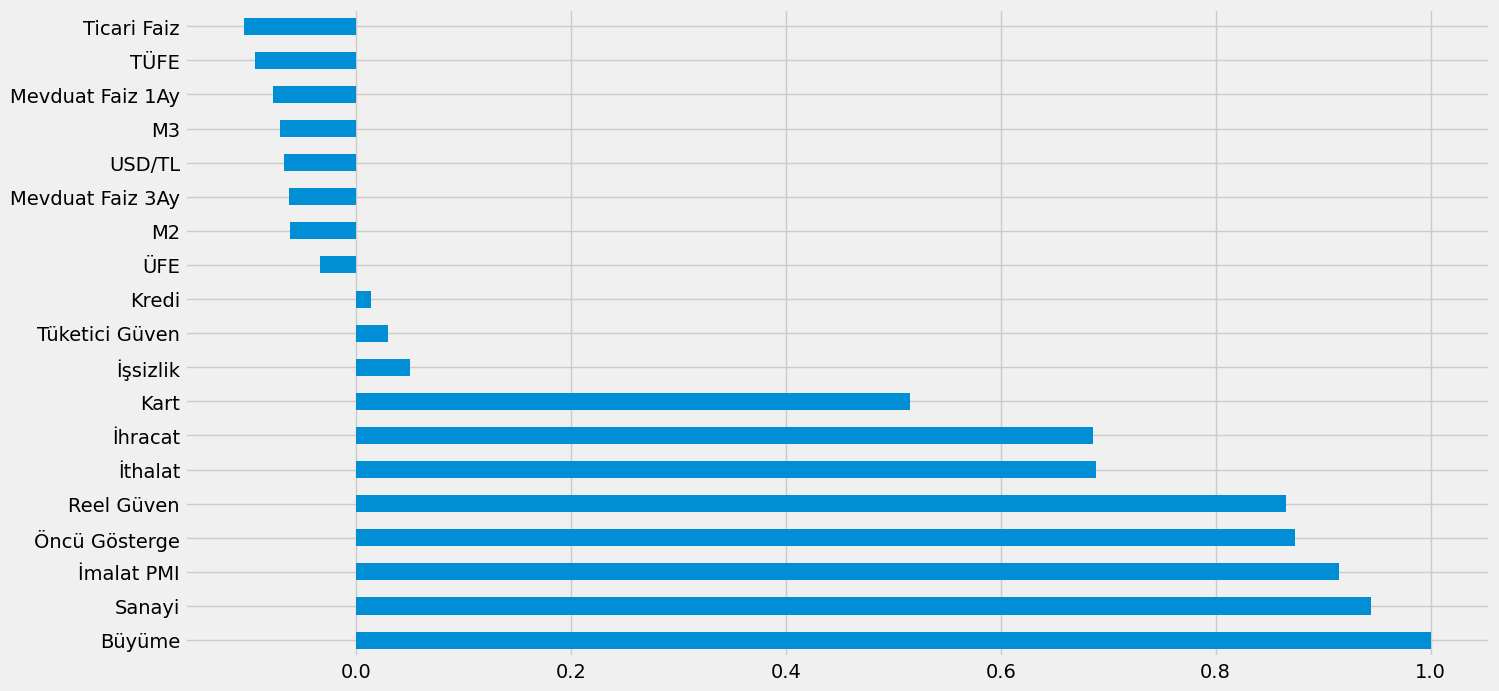

In [28]:
data.corr()["Büyüme"].sort_values(ascending=False).plot(kind="barh",figsize=(15,8))

In [29]:
X=data[["Kart","İhracat","İthalat","Reel Güven","Öncü Gösterge","İmalat PMI","Sanayi"]]
y=data["Büyüme"]
X_train,X_test=X.iloc[:-7,:],X.iloc[-7:,:]
y_train,y_test=y[:-7],y[-7:]
model,tahminler=LazyRegressor(predictions=True).fit(X_train,X_test,y_train,y_test)

100%|██████████| 42/42 [00:01<00:00, 24.38it/s]

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 33, number of used features: 0
[LightGBM] [Info] Start training from score 1.234034
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spli

In [30]:
tahminler["Büyüme"]=y_test.values
tahminler[["RANSACRegressor","Büyüme"]]

,RANSACRegressor,Büyüme
0,-0.84,0.54
1,0.85,1.15
2,0.11,-0.16
3,3.04,3.61
4,1.41,0.31
5,0.61,0.95
6,1.57,0.00


In [25]:

features=['Kart', 'İhracat', 'İthalat', 'Reel Güven', 'Öncü Gösterge',
       'İmalat PMI', 'Sanayi','Büyüme']
data1=data[features]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler = StandardScaler()
scaled_data["Büyüme"]=scaler.fit_transform(np.array(data1["Büyüme"]).reshape(-1, 1))
scaled_data

,Kart,İhracat,İthalat,Reel Güven,Öncü Gösterge,İmalat PMI,Sanayi,Büyüme
0,-0.22,-0.14,0.59,0.65,0.92,-0.17,-0.44,-0.82
1,-0.43,-0.56,-0.45,-0.24,-0.03,-0.28,0.03,0.37
2,-0.81,0.11,0.10,0.15,0.15,0.04,-0.12,0.05
3,-0.56,-0.78,-1.69,-0.42,-0.19,0.10,-0.03,0.21
4,0.16,-0.36,0.14,0.06,-0.19,0.80,0.35,0.10
5,-0.65,-0.89,-0.97,-0.36,-0.11,-0.04,0.10,0.07
6,-0.93,0.75,0.03,0.43,0.23,0.02,-0.17,-0.00
7,-0.80,-0.73,-0.96,-0.02,-0.47,-0.06,-0.07,-0.24
8,-0.11,0.50,1.15,-0.12,0.50,0.02,-0.09,0.07
9,-0.74,-1.35,-1.35,-0.06,-0.24,-0.23,-0.58,-1.18


In [111]:
from sklearn.model_selection import train_test_split
X=scaled_data
X=X.iloc[:,:-1]
y=scaled_data["Büyüme"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=scaled_data.columns[:-1])
y=pd.DataFrame(y,columns=["Büyüme"])
X_train,X_test=X.iloc[:-9,:],X.iloc[-9:-1,:]
y_train,y_test=y[:-9],y[-9:-1]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)

In [28]:
import optuna
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,GRU,SimpleRNN
import keras
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras.layers import LSTM, Dense, Dropout
from keras.regularizers import l2
def objective(trial):
    # Define hyperparameters to be optimized
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-1)
    units1 = trial.suggest_int('units1', 1, 128)
    batch_size = trial.suggest_int('batch_size', 2, 64)
    activation1 = trial.suggest_categorical('activation1', ['tanh','selu','relu','sigmoid'])
    optimizer = trial.suggest_categorical('optimizer', ['adam'])
    rlrate=trial.suggest_float('rlrate',0.001,0.999)
    rlrate2=trial.suggest_float('rlrate2',0.001,0.999)
    rlrate3=trial.suggest_float('rlrate3',0.001,0.999)
    keras.utils.set_random_seed(42)
    early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
    model = Sequential()   
    model.add(Dense(units=units1,activation=activation1,input_dim=(X_train.shape[1]),kernel_regularizer=l2(rlrate)))
    model.add(Dense(units=units1,activation=activation1,input_dim=(X_train.shape[1]),kernel_regularizer=l2(rlrate2)))
    model.add(Dense(units=units1,activation=activation1,input_dim=(X_train.shape[1]),kernel_regularizer=l2(rlrate3)))
    model.add(Dense(units=1))

    if optimizer == 'adam':
       optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
       optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
    elif optimizer == 'SGD':
       optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)  

    

    

    model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])

    # Train model
    model.fit(X_train, y_train, epochs=1000, batch_size=batch_size,callbacks=[early_stopping],verbose=0,validation_data=(X_val,y_val))

    # Evaluate model
    y_pred = model.predict(X_test)
    mse = mean_squared_error(scaler.inverse_transform(y_test), scaler.inverse_transform(y_pred))

    return mse  # Return validation accuracy as the objective

In [ ]:
study = optuna.create_study(direction='minimize')  # or 'minimize' depending on your objective
study.optimize(objective, n_trials=2000)  # You can adjust the number of trials

# Print the best hyperparameters
print('Best hyperparameters:', study.best_params)

In [95]:
keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
model = Sequential()   
model.add(Dense(units=85,activation='relu',input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.9082728386551688)))
model.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.06212337752099027)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=1000, batch_size=35,callbacks=[early_stopping],verbose=1,validation_data=(X_val,y_val))
y_pred = model.predict(X_test)

Epoch 1/1000
1/1 [==============================] - 1s 759ms/step - loss: 12.7933 - mean_squared_error: 1.1728 - val_loss: 6.4527 - val_mean_squared_error: 0.0508
Epoch 2/1000
1/1 [==============================] - 0s 62ms/step


In [96]:
pred=scaler.inverse_transform(model.predict(np.array(scaled_data.iloc[-13:,:-1])))
pred=pd.DataFrame(pred)
pred.columns=["Büyüme"]
pred=pred.set_index(pd.date_range(start="2021-03-30",periods=len(pred),freq="Q"))
pred

1/1 [==============================] - 0s 55ms/step


,Büyüme
2021-03-31,1.42
2021-06-30,1.33
2021-09-30,3.02
2021-12-31,1.81
2022-03-31,0.84
2022-06-30,1.52
2022-09-30,0.43
2022-12-31,1.33
2023-03-31,0.99
2023-06-30,2.76


In [97]:
tahminler=pd.DataFrame()
tahminler["Büyüme"]=data["Büyüme"].iloc[-13:]
tahminler["Tahmin"]=pred["Büyüme"]
tahminler

,Büyüme,Tahmin
2021-03-31,2.03,1.42
2021-06-30,1.71,1.33
2021-09-30,3.65,3.02
2021-12-31,1.57,1.81
2022-03-31,0.21,0.84
2022-06-30,1.41,1.52
2022-09-30,0.54,0.43
2022-12-31,1.15,1.33
2023-03-31,-0.16,0.99
2023-06-30,3.61,2.76


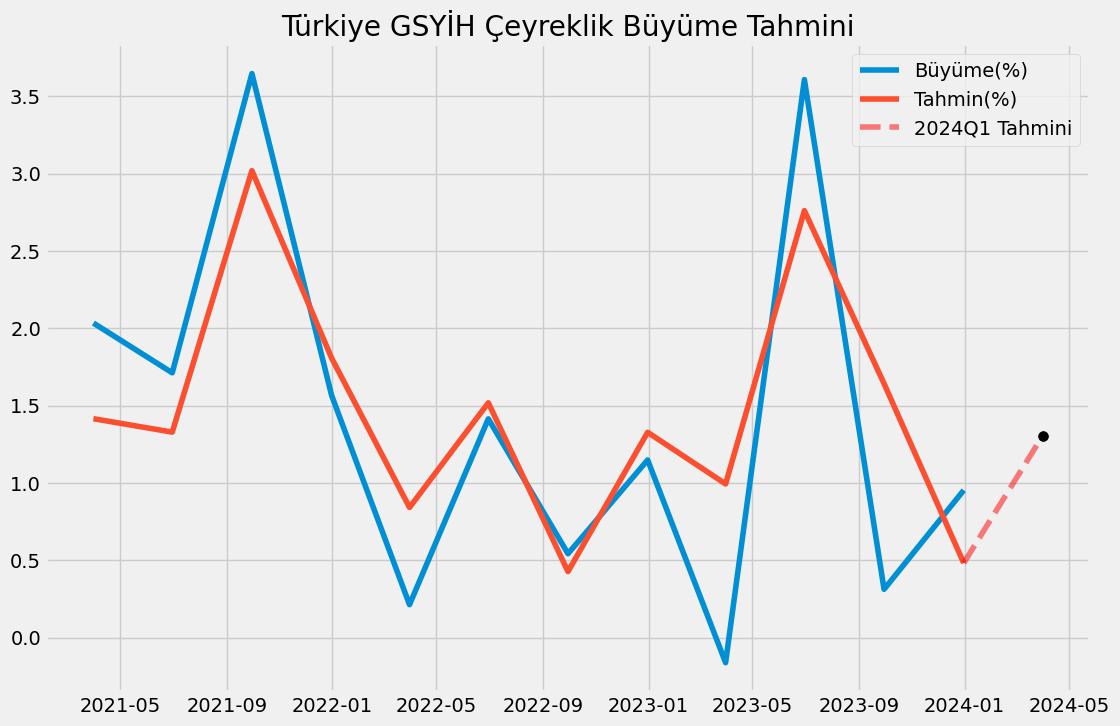

In [98]:
plt.figure(figsize=(12,8))
plt.title("Türkiye GSYİH Çeyreklik Büyüme Tahmini")
plt.plot(tahminler["Büyüme"][:-1],label="Büyüme(%)")
plt.plot(tahminler["Tahmin"][:-1],label="Tahmin(%)")
plt.plot(tahminler["Tahmin"].iloc[-2:],"--",label="2024Q1 Tahmini",color="red",alpha=0.5)
plt.scatter(x=tahminler.index[-1],y=tahminler["Tahmin"][-1],color="black",s=50,zorder=3)
plt.legend()

## Yıllık büyüme tahmini:%6.98

In [107]:
from sklearn.model_selection import train_test_split
X=scaled_data
X=X.iloc[:,:-1]
y=scaled_data["Büyüme"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=scaled_data.columns[:-1])
y=pd.DataFrame(y,columns=["Büyüme"])
X_train,X_test=X.iloc[:-9,:],X.iloc[-9:-1,:]
y_train,y_test=y[:-9],y[-9:-1]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)

In [103]:
study.best_params

{'learning_rate': 0.0382463624747776,
 'units1': 102,
 'batch_size': 5,
 'activation1': 'relu',
 'optimizer': 'adam',
 'rlrate': 0.46486063063532823}

In [104]:
keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
model = Sequential()   
model.add(Dense(units=102,activation='relu',input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.46486063063532823)))
model.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0382463624747776)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=1000, batch_size=5,callbacks=[early_stopping],verbose=1,validation_data=(X_val,y_val))
y_pred = model.predict(X_test)

Epoch 1/1000
6/6 [==============================] - 2s 227ms/step - loss: 4.4122 - mean_squared_error: 1.1792 - val_loss: 2.4944 - val_mean_squared_error: 0.5428
Epoch 2/1000
1/1 [==============================] - 0s 61ms/step


In [108]:
pred=scaler.inverse_transform(model.predict(np.array(scaled_data.iloc[-9:,:-1])))
pred=pd.DataFrame(pred)
pred.columns=["Büyüme"]
pred=pred.set_index(pd.date_range(start="2022-03-30",periods=len(pred),freq="Q"))
pred

1/1 [==============================] - 0s 28ms/step


,Büyüme
2022-03-31,0.59
2022-06-30,1.10
2022-09-30,0.99
2022-12-31,1.15
2023-03-31,0.85
2023-06-30,2.87
2023-09-30,1.32
2023-12-31,0.94
2024-03-31,1.92


In [109]:
tahminler=pd.DataFrame()
tahminler["Büyüme"]=data["Büyüme"].iloc[-9:]
tahminler["Tahmin"]=pred["Büyüme"]
tahminler

,Büyüme,Tahmin
2022-03-31,0.21,0.59
2022-06-30,1.41,1.10
2022-09-30,0.54,0.99
2022-12-31,1.15,1.15
2023-03-31,-0.16,0.85
2023-06-30,3.61,2.87
2023-09-30,0.31,1.32
2023-12-31,0.95,0.94
2024-03-31,0.00,1.92


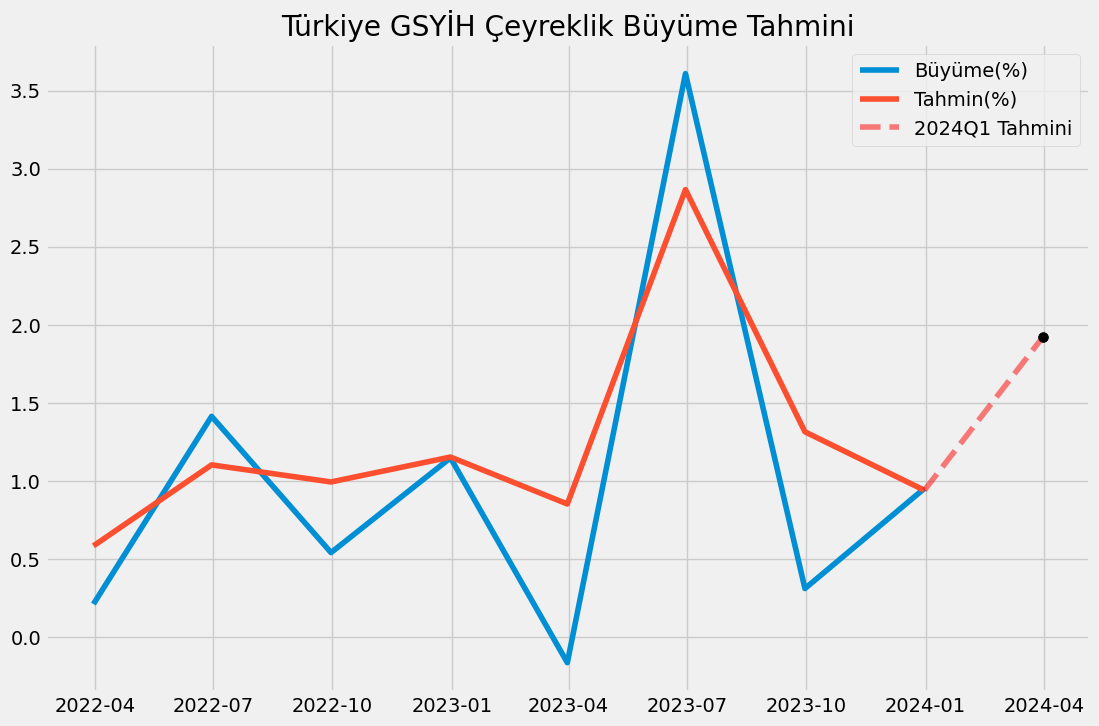

In [110]:
plt.figure(figsize=(12,8))
plt.title("Türkiye GSYİH Çeyreklik Büyüme Tahmini")
plt.plot(tahminler["Büyüme"][:-1],label="Büyüme(%)")
plt.plot(tahminler["Tahmin"][:-1],label="Tahmin(%)")
plt.plot(tahminler["Tahmin"].iloc[-2:],"--",label="2024Q1 Tahmini",color="red",alpha=0.5)
plt.scatter(x=tahminler.index[-1],y=tahminler["Tahmin"][-1],color="black",s=50,zorder=3)
plt.legend()

In [29]:
from sklearn.model_selection import train_test_split
X=scaled_data
X=X.iloc[:,:-1]
y=scaled_data["Büyüme"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=scaled_data.columns[:-1])
y=pd.DataFrame(y,columns=["Büyüme"])
X_train,X_test=X.iloc[:-9,:],X.iloc[-9:-1,:]
y_train,y_test=y[:-9],y[-9:-1]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)

In [30]:
keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
model = Sequential()   
model.add(Dense(units=13,activation='selu',input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.43991302892520123)))
model.add(Dense(units=13,activation='selu',input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.8358862453157359)))
model.add(Dense(units=13,activation='selu',input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.8324500980882791)))
model.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.09781679549208842)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=1000, batch_size=38,callbacks=[early_stopping],verbose=1,validation_data=(X_val,y_val))
y_pred = model.predict(X_test)

Epoch 1/1000
1/1 [==============================] - 1s 1s/step - loss: 25.9223 - mean_squared_error: 1.0519 - val_loss: 15.1405 - val_mean_squared_error: 0.2886
Epoch 2/1000
1/1 [==============================] - 0s 119ms/step


In [80]:
pred=scaler.inverse_transform(model.predict(np.array(scaled_data.iloc[-9:,:-1])))
pred=pd.DataFrame(pred)
pred.columns=["Büyüme"]
pred=pred.set_index(pd.date_range(start="2022-03-30",periods=len(pred),freq="Q"))
pred

1/1 [==============================] - 0s 24ms/step


,Büyüme
2022-03-31,0.41
2022-06-30,1.18
2022-09-30,0.44
2022-12-31,0.67
2023-03-31,0.36
2023-06-30,2.66
2023-09-30,1.42
2023-12-31,0.69
2024-03-31,1.57


In [82]:
tahminler=pd.DataFrame()
tahminler["Büyüme"]=data["Büyüme"].iloc[-9:]
tahminler["Tahmin"]=pred["Büyüme"]
tahminler

,Büyüme,Tahmin
2022-03-31,0.21,0.41
2022-06-30,1.41,1.18
2022-09-30,0.54,0.44
2022-12-31,1.15,0.67
2023-03-31,-0.16,0.36
2023-06-30,3.61,2.66
2023-09-30,0.31,1.42
2023-12-31,0.95,0.69
2024-03-31,0.00,1.57


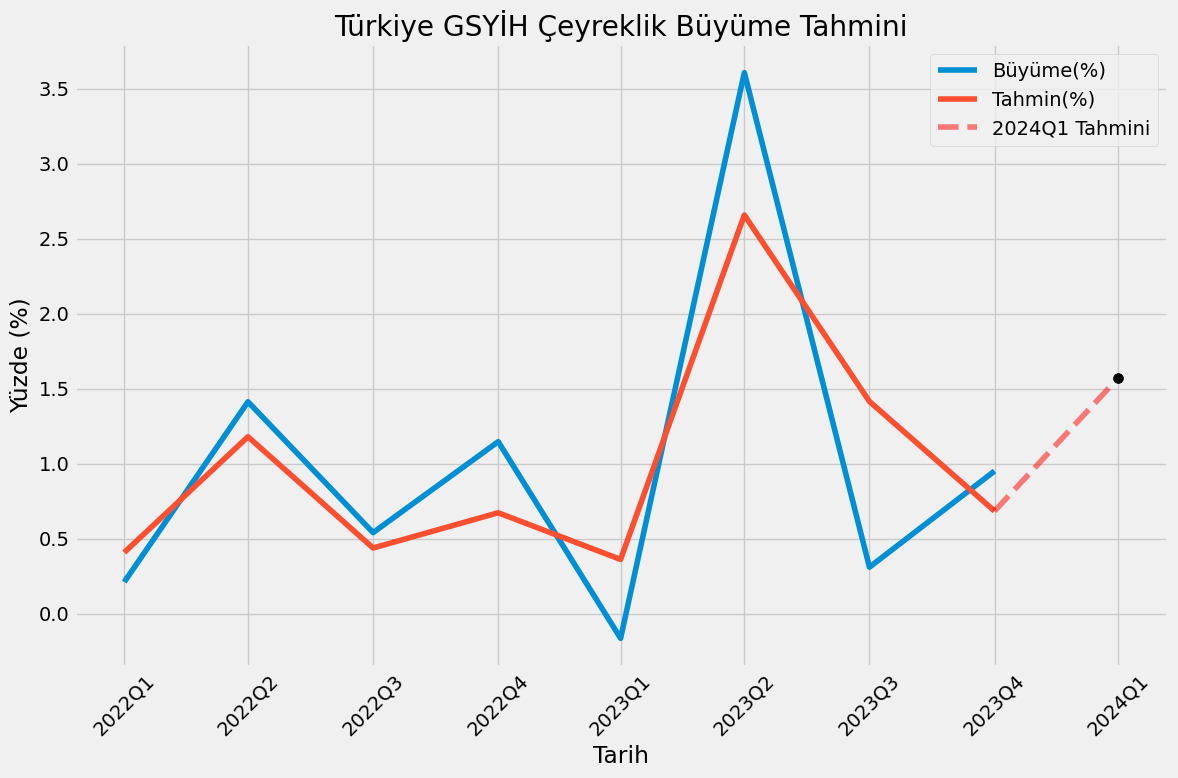

In [83]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def tarih_ceyrek(tarih):
    yil = tarih.year
    ay = tarih.month
    if ay <= 3:
        return f"{yil}Q1"
    elif ay <= 6:
        return f"{yil}Q2"
    elif ay <= 9:
        return f"{yil}Q3"
    else:
        return f"{yil}Q4"

plt.figure(figsize=(12, 8))
plt.title("Türkiye GSYİH Çeyreklik Büyüme Tahmini")

# Tahminlerin çizimi
plt.plot(tahminler["Büyüme"][:-1], label="Büyüme(%)")
plt.plot(tahminler["Tahmin"][:-1], label="Tahmin(%)")

# 2024Q1 Tahmini çizimi
plt.plot(tahminler["Tahmin"].iloc[-2:], "--", label="2024Q1 Tahmini", color="red", alpha=0.5)

# Son tahmin noktasının gösterimi
plt.scatter(x=tahminler.index[-1], y=tahminler["Tahmin"][-1], color="black", s=50, zorder=3)

# Eksen etiketlerinin ve gösterge için konfigürasyon
plt.legend()
# Çeyreklik gösterimi için eksen etiketlerinin ve formatın ayarlanması
tarihler = [tarih_ceyrek(t) for t in tahminler.index]
plt.xticks(ticks=tahminler.index, labels=tarihler, rotation=45)
plt.xlabel('Tarih')
plt.ylabel('Yüzde (%)')
plt.grid(True)


plt.tight_layout()
plt.show()
